In [1]:
import sys
import os

sys.path.append('../')

%load_ext autoreload
%autoreload 2
%matplotlib inline



In [2]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from skimage.io import imread

from gen.load_data import load_data

In [3]:
from sklearn.utils import shuffle

train_df, valid_df, test_df = load_data('../data')

train_df = shuffle(train_df)
valid_df = shuffle(valid_df)

print(train_df.head())


                                                image                   id  \
1545  ../data/Train/CameraRGB/episode_0001_000161.png  episode_0001_000161   
2047  ../data/Train/CameraRGB/episode_0003_000126.png  episode_0003_000126   
428                   ../data/Train/CameraRGB/442.png                  442   
2343                  ../data/Train/CameraRGB/424.png                  424   
433                   ../data/Train/CameraRGB/850.png                  850   

                                                label  
1545  ../data/Train/CameraSeg/episode_0001_000161.png  
2047  ../data/Train/CameraSeg/episode_0003_000126.png  
428                   ../data/Train/CameraSeg/442.png  
2343                  ../data/Train/CameraSeg/424.png  
433                   ../data/Train/CameraSeg/850.png  


In [4]:
from models.segnet import model_segnet

model = model_segnet(3, image_shape=(480, 480, 3))
# model.summary()

/home/faisal/anaconda3/envs/ai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Build enceder done..
Build decoder done..


In [5]:
from gen.generators import train_and_lab_gen_func

BATCH_SIZE = 8
model_dir = '../saved_models/segnet_full/'

train_gen = train_and_lab_gen_func(train_df, image_size=(600, 800), target_size=(480, 480), batch_size = BATCH_SIZE)
valid_gen = train_and_lab_gen_func(valid_df, image_size=(600, 800), target_size=(480, 480), batch_size = BATCH_SIZE)


In [6]:
from train import weighted_categorical_crossentropy
from keras.utils.training_utils import multi_gpu_model

weights = np.array([10, 5, 1])

gpus = 2

model_gpu = multi_gpu_model(model, gpus)
# model_gpu.__setattr__('callback_model',model)

model_gpu.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [7]:
from train import train_nn

m = train_df.shape[0]
history = train_nn(model_gpu, 
                   train_gen, 
                   valid_gen, 
                   training_size=m, 
                   batch_size=BATCH_SIZE,
                   validation_size=valid_df.shape[0],
                   output_path=model_dir, 
                   epochs=500,
                   gpus = 2)

/home/faisal/anaconda3/envs/ai/lib/python3.6/site-packages/keras/engine/training.py:2095: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


## Ignore next message from keras, values are replaced anyways
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
## Ignore next message from keras, values are replaced anyways
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 500 images
Reinserting dataframe: 500 images
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 500 images
## Ignore next message from keras, values are replaced anyways
## Ignore next message from keras, values are replaced any

Epoch 31/500
156/156 [==============================] - 277s 2s/step - loss: 0.0346 - acc: 0.9898 - val_loss: 0.2284 - val_acc: 0.9385

Epoch 00031: val_loss did not improve
Epoch 32/500
156/156 [==============================] - 275s 2s/step - loss: 0.0365 - acc: 0.9890 - val_loss: 0.2031 - val_acc: 0.9347

Epoch 00032: val_loss did not improve
Epoch 33/500
156/156 [==============================] - 275s 2s/step - loss: 0.0361 - acc: 0.9890 - val_loss: 0.3658 - val_acc: 0.9003

Epoch 00033: val_loss did not improve
Epoch 34/500
156/156 [==============================] - 278s 2s/step - loss: 0.0380 - acc: 0.9883 - val_loss: 0.1418 - val_acc: 0.9551

Epoch 00034: val_loss did not improve
Epoch 35/500
156/156 [==============================] - 276s 2s/step - loss: 0.0334 - acc: 0.9897 - val_loss: 0.1098 - val_acc: 0.9662

Epoch 00035: val_loss improved from 0.12730 to 0.10981, saving model to ../saved_models/segnet_full//model.hdf5
Epoch 36/500
156/156 [==============================] - 

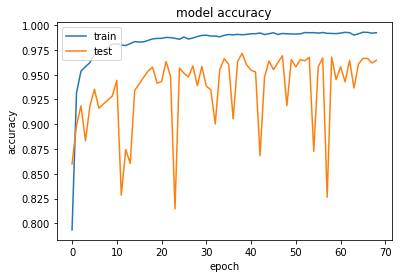

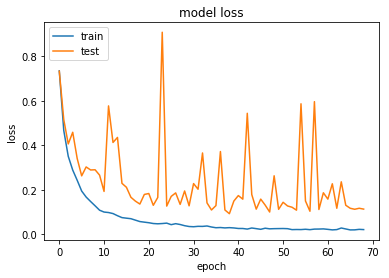

In [8]:
# # summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
model.save('../saved_models/segnet/model_saved.h5')

In [10]:
model.save('../saved_models/segnet_full/model_saved.h5')